#Extracting and Visualizing Stock Data


**Description**


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this project, we will extract some stock data, we will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Use yfinance to Extract Stock Data</li>
        <li>Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Use yfinance to Extract Stock Data</li>
        <li>Use Webscraping to Extract GME Revenue Data</li>
        <li>Plot Tesla Stock Graph</li>
        <li>Plot GameStop Stock Graph</li>
    </ul>

</div>

<hr>


In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Ignore warnings using the warnings module


In [29]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

## **Define Graphing Function**


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph_matplotlib(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    # Convert dates to datetime for consistent plotting
    stock_data_specific['Date'] = pd.to_datetime(stock_data_specific['Date'])
    revenue_data_specific['Date'] = pd.to_datetime(revenue_data_specific['Date'])

    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    fig.suptitle(stock, fontsize=16)

    # Plot Stock Price
    axes[0].plot(stock_data_specific['Date'], stock_data_specific['Close'].astype('float'), label='Share Price')
    axes[0].set_title('Historical Share Price')
    axes[0].set_ylabel('Price ($US)')
    axes[0].legend()

    # Plot Revenue
    axes[1].plot(revenue_data_specific['Date'], revenue_data_specific['Revenue'].astype('float'), label='Revenue', color='orange')
    axes[1].set_title('Historical Revenue')
    axes[1].set_ylabel('Revenue ($US Millions)')
    axes[1].set_xlabel('Date')
    axes[1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

# Example call:
# make_graph_matplotlib(stock_data, revenue_data, "Stock Name")

## **Use yfinance to Extract Stock Data**


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [5]:
tesla_data = tesla.history(period = "max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [6]:
tesla_data.reset_index(inplace=True)

In [7]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## **Use Webscraping to Extract Tesla Revenue Data**


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [9]:
html_data  = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [10]:
tesla_soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [11]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"]) #Initialize an empty DataFrame

tesla_table = tesla_soup.find_all("tbody")[1] # Find the relevant table

for row in tesla_table.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

In [12]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Execute the following line to remove the comma and dollar sign from the `Revenue` column.


In [13]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$',"", regex = True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [14]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function.


In [15]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## **Use yfinance to Extract Stock Data**


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [16]:
gamestop = yf.Ticker("GME")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [17]:
gme_data = gamestop.history(period = "max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function.


In [18]:
gme_data.reset_index(inplace=True)

In [19]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674835,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## **Use Webscraping to Extract GME Revenue Data**


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [20]:
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [21]:
html_data_2  = requests.get(url_2).text

Parse the html data using `beautiful_soup` using parser  `html.parser`.


In [22]:
gme_soup = BeautifulSoup(html_data_2, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


In [23]:
gme_revenue = pd.DataFrame(columns=["Date","Revenue"]) #Initialize an empty DataFrame

gme_table = gme_soup.find_all("tbody")[1] # Find the relevant table

for row in gme_table.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

In [24]:
gme_revenue.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


In [25]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$',"", regex = True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [26]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## **Plot Tesla Stock Graph**


Use the `make_graph_matplotlib` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


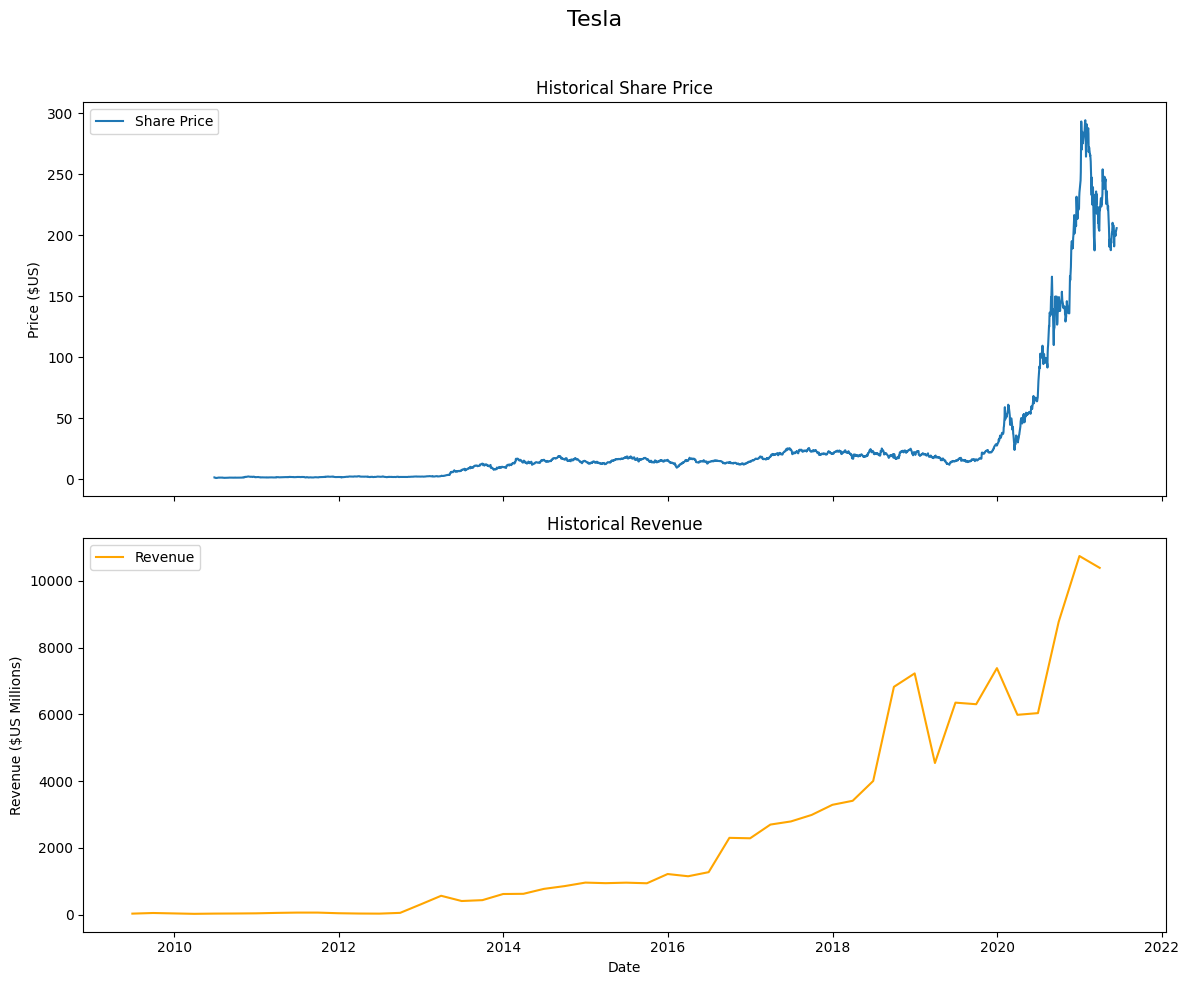

In [30]:
make_graph_matplotlib(tesla_data,tesla_revenue, 'Tesla')

## **Plot GameStop Stock Graph**


Use the `make_graph_matplotlib` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph_matplotlib` function is `make_graph_matplotlib(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


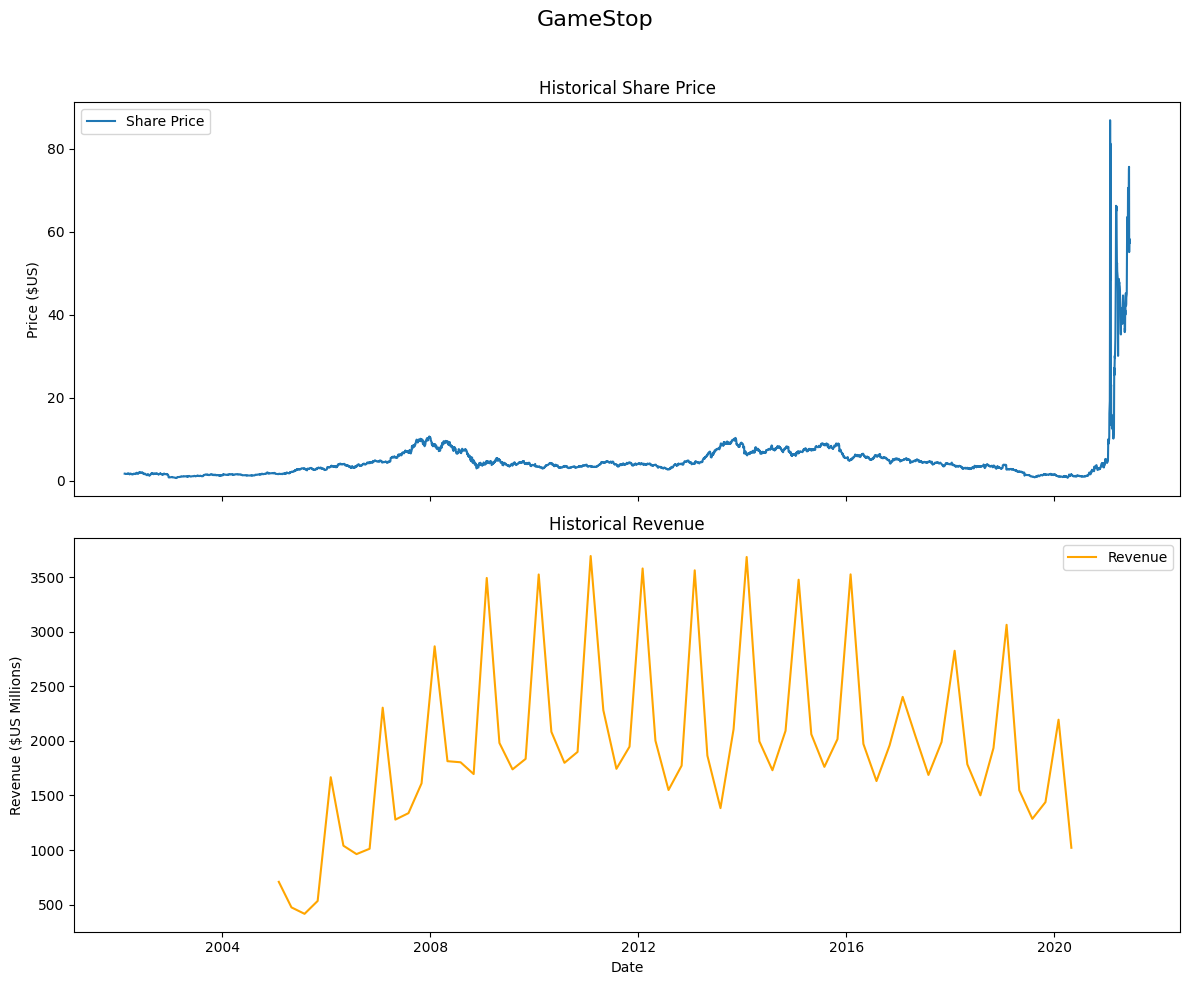

In [31]:
make_graph_matplotlib(gme_data,gme_revenue,'GameStop')